In [1]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from unicodedata import numeric
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

telco = pd.read_csv('telco.csv')
telco_preprocessed = telco.copy()

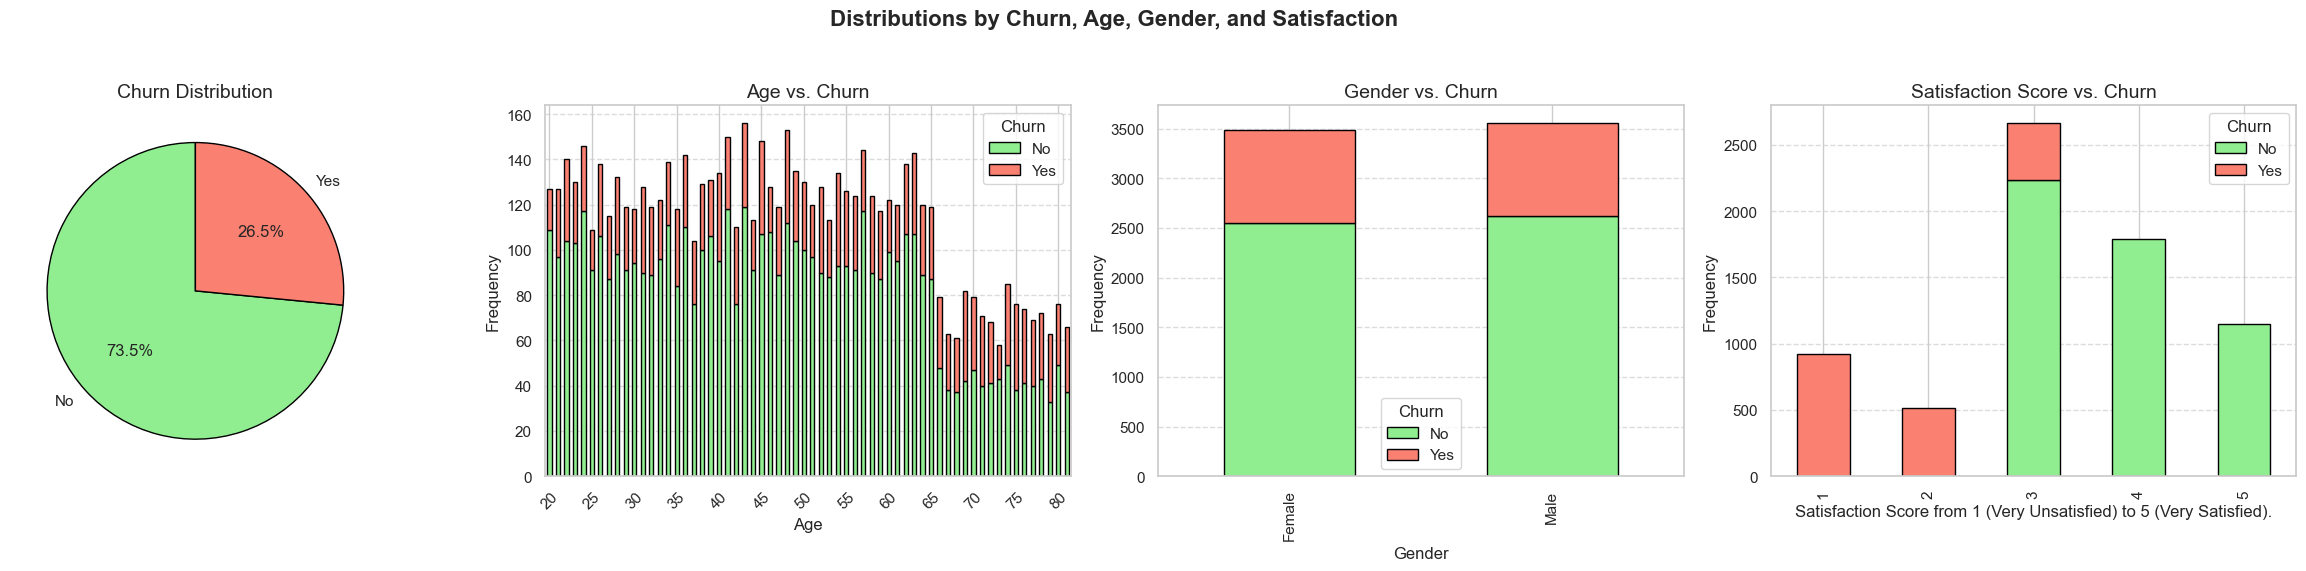

In [2]:
#The code for plotting in thiy section was originally witten by us and then improved with help from ChatGPT-4o and adjusted back to out data, to achieve better visualization. 

# Set global style
sns.set_theme(style="whitegrid")

# Create a figure with subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
fig.suptitle('Distributions by Churn, Age, Gender, and Satisfaction', fontsize=16, weight='bold')

# Churn distribution: Pie chart
churn_distribution = telco['Churn Label'].value_counts()
axes[0].pie(
    churn_distribution,
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Churn Distribution', fontsize=14)

# Age: Stacked bar chart with churn breakdown and x-axis labels starting at 20, step 5
age_churn = telco.groupby(['Age', 'Churn Label']).size().unstack(fill_value=0)
age_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=axes[1], edgecolor='black')
axes[1].set_title('Age vs. Churn', fontsize=14)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend(title='Churn', labels=['No', 'Yes'])
axes[1].set_xticks(range(0, len(age_churn), 5))  # Adjust ticks for every 5th bar
axes[1].set_xticklabels(age_churn.index[1::5], rotation=45)  # Labels for ages starting at 20, step 5
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Gender: Stacked bar chart with churn breakdown
gender_churn = telco.groupby(['Gender', 'Churn Label']).size().unstack(fill_value=0)
gender_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=axes[2], edgecolor='black')
axes[2].set_title('Gender vs. Churn', fontsize=14)
axes[2].set_xlabel('Gender', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].legend(title='Churn', labels=['No', 'Yes'])
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Satisfaction Score: Stacked bar chart with churn breakdown
satisfaction_churn = telco.groupby(['Satisfaction Score', 'Churn Label']).size().unstack(fill_value=0)
satisfaction_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=axes[3], edgecolor='black')
axes[3].set_title('Satisfaction Score vs. Churn', fontsize=14)
axes[3].set_xlabel('Satisfaction Score from 1 (Very Unsatisfied) to 5 (Very Satisfied).', fontsize=12)
axes[3].set_ylabel('Frequency', fontsize=12)
axes[3].legend(title='Churn', labels=['No', 'Yes'])
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
